# Pi-filter
Last update: 12 Feb 2024  

![Pi filter](Pi-Filter.png){#fig-pi-filter}  


## Introduction

[electronics stackexchange](https://electronics.stackexchange.com/)

Question posted on Electronics Stackexchange by @user15174 asked: 

>Am trying to apply the FACTS method to find out the transfer function for this circuit as shown below. This is a Pi-filter circuit with all its component parasitics and also including the source and load resistances. I would like to find out the transfer function of this circuit and match its plot from Mathcad with simulation.

The FACTS reference is from @basso2016

https://electronics.stackexchange.com/questions/681002/how-to-find-transfer-function-for-this-pi-filter-using-facts-method-with-6-react/681087#681087



Get a list of references.


What is the FACTS method?  See presentation for somewhat of an explination

- Brute-force algebra complicates analysis  
- More energy is needed to unveil these terms  
- factor and rearrange coefficients  
- simplify numerator and denominator  
- Don’t make mistakes!  

This is a high-entropy expression  

- What if you could write the expression in one shot?  
- Naturally reading gains, poles and zeros...  
- This is a low-entropy expression  

- Fast Analytical Techniques at a Glance  
- Look at the circuit for s = 0  
- Capacitor are open circuited  
- Inductors are short circuited  
- SPICE operating point calculation  
- Determine the gain in this condition


- Plotting a transfer function is easy with nowadays tools
- You have no insight on what affects poles or zeros
- Analytical analysis is important but the form matters
- A low-entropy expression unveils contributors to poles/zeros
- FACTs naturally lead to low-entropy expressions
- Break the circuit into simple schematics
- Determine time constants in each configuration
- Small-signal analysis makes extensive use of FACTs
- SPICE and Mathcad are useful instruments to track errors
- Becoming skilled with FACT requires practice and tenacity!


@fig-pi-filter

- why this circuit?
- what if parisidic elements are set to zero?




## Circuit description

## Circuit analysis
 
- find the transfer function


The net list for the filter is:
```
V1 8 0 1
R1 1 8 1
R2 1 4 1
R3 3 1 1
R4 2 3 1
R5 2 6 1
R6 2 0 1
L1 4 5 1 Rser=0
L2 3 2 1 Rser=0
L3 6 7 1 Rser=0
C1 5 0 1
C2 2 3 1
C3 7 0 1
```

The following Python modules are used.

In [1]:
from sympy import *
import numpy as np
from tabulate import tabulate
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
import SymMNA
from IPython.display import display, Markdown, Math, Latex
init_printing()

## FACTs
Write the impedances for each of the legs on the pi network

Franc's answer walks through the FACTS method


### References

Methods of Design Oriented Analysis](https://www.scribd.com/document/422935307/Methods-of-design-oriented-analysis)

@Middlebrook1992, Methods of Design-Oriented Analysis: The Quadratic Equation Revisited

@Middlebrook1991, Low-entropy expressions: the key to design-oriented analysis

@basso2016, Introduction to Fast Analytical Techniques: Application to Small-Signal Modeling

<!--
Methods of DE~sign-Oriented Analysis: The Quadratic Equation Revisited
@INPROCEEDINGS{Middlebrook1992,
  author={Middlebrook, R.D.},
  booktitle={Proceedings. Twenty-Second Annual conference Frontiers in Education}, 
  title={Methods of Design-Oriented Analysis: The Quadratic Equation Revisited}, 
  year={1992},
  pages={95-102},
  doi={10.1109/FIE.1992.683365}
}

Low-entropy expressions: the key to design-oriented analysis
@INPROCEEDINGS{Middlebrook1991,
  author={Middlebrook, R.D.},
  booktitle={Proceedings Frontiers in Education Twenty-First Annual Conference. Engineering Education in a New World Order}, 
  title={Low-entropy expressions: the key to design-oriented analysis}, 
  year={1991},
  pages={399-403},
  doi={10.1109/FIE.1991.187513}
}

@online{basso2016,
    author = {Basso, Christophe},
    title = {Introduction to Fast Analytical Techniques: Application to Small-Signal Modeling},
    url  = {https://www.powersimtof.com/Downloads/PPTs/Chris%20Basso%20APEC%20seminar%202016.pdf},
    year={2016},
    addendum = {accessed 12 Feb 2024}
}

-->

[Introduction to Fast Analytical Techniques: Application to Small-Signal Modeling](https://www.powersimtof.com/Downloads/PPTs/Chris%20Basso%20APEC%20seminar%202016.pdf)


Three components in series
```
Z1 = R2 + L1 + C1

Z2 = R3 + (L2 || C2 || R4)

Z3 = R5 + L3 + C3
```

symbols](https://docs.sympy.org/latest/tutorials/intro-tutorial/gotchas.html#symbols)

symbols takes a string of variable names separated by spaces or commas, and creates Symbols out of them.


In [19]:
L1, L2, L3, R1, R2, R3, R4, R5, R6, C1, C2, C3, s = symbols('L1, L2, L3, R1, R2, R3, R4, R5, R6, C1, C2, C3, s')

In [20]:
Z1 = R2+s*L1+1/(s*C1)

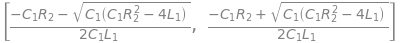

In [21]:
solve(Z1,s)

In [22]:
Z2 = R3 + (s*L2*(1/(s*C2))*R4)/(1/(s*C2)+s*L2+R4)    # products over sums of (L2 || C2 || R4) plus R3, 

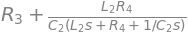

In [23]:
Z2

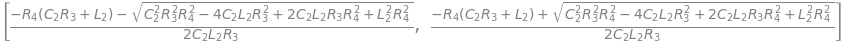

In [24]:
solve(Z2,s)

In [25]:
Z3 = R5+s*L3+1/(s*C3)

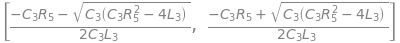

In [26]:
solve(Z3,s)

![Pi filter FACTS](Pi-Filter-facts.png){#fig-pi-filter-facts}  

### Transfer function at node 2

Pi section is Z1, Z2 and Z3. R6 is the load impedance and R1 is the source impedance.

we have (R6 || with Z3)

[Z2 + (R6 || with Z3)]

```
V1 3 0 1
R1 1 3 1
R6 2 0 1
R_Z1 1 0 1
R_Z2 2 1 1
R_Z3 2 0 1
```


In [27]:
H_facts = R6*Z3/(R6*Z2 + R6*Z3 + Z2*Z3)

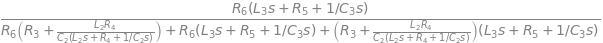

In [28]:
H_facts

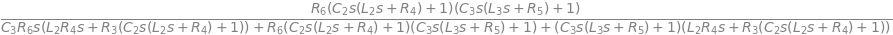

In [29]:
H_facts.simplify()

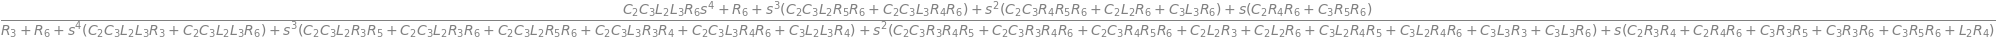

In [30]:
cancel(H_facts,s)

Not the same as H_sys obtained below. 

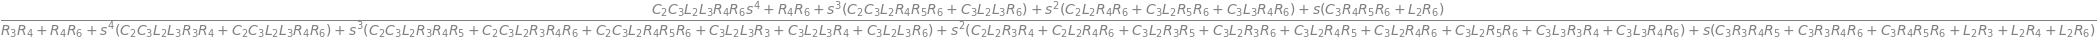

In [72]:
cancel(H_sym,s)

In [73]:
H_sym == H_facts

False

Using NMA to get the FACTS network equations and solve

In [33]:
net_list = '''
V1 3 0 1
R1 1 3 1
R6 2 0 1
R_Z1 1 0 1
R_Z2 2 1 1
R_Z3 2 0 1
'''

Generate the network equations.

In [34]:
report, network_df, df2, A, X, Z = SymMNA.smna(net_list)

# Put matricies into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_facts = Eq(A*X,Z)

Generate markdown text to display the network equations.

In [35]:
temp = ''
for i in range(len(X)):
    temp += '${:s}$<br>'.format(latex(Eq((A*X)[i:i+1][0],Z[i])))

Markdown(temp)

$v_{1} \cdot \left(\frac{1}{R_{z2}} + \frac{1}{R_{z1}} + \frac{1}{R_{1}}\right) - \frac{v_{2}}{R_{z2}} - \frac{v_{3}}{R_{1}} = 0$<br>$v_{2} \cdot \left(\frac{1}{R_{z3}} + \frac{1}{R_{z2}} + \frac{1}{R_{6}}\right) - \frac{v_{1}}{R_{z2}} = 0$<br>$I_{V1} - \frac{v_{1}}{R_{1}} + \frac{v_{3}}{R_{1}} = 0$<br>$v_{3} = V_{1}$<br>

In [36]:
# turn the free symbols into SymPy variables
var(str(NE_facts.free_symbols).replace('{','').replace('}',''))

Built a dictionary of element values.

In [37]:
element_values = SymMNA.get_part_values(network_df)
element_values

Generate the symbolic solution, which takes a couple of minutes on my laptop's Intel i3-8130U CPU @ 2.20GHz.

In [38]:
U_facts = solve(NE_facts,X)

The solution to the network equations in symbolic form are long, so the code to display them is commented out.

In [39]:
temp = ''
for i in U_facts.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U_facts[i]))

Markdown(temp)

$v_{1} = \frac{R_{6} R_{z1} R_{z2} V_{1} + R_{6} R_{z1} R_{z3} V_{1} + R_{z1} R_{z2} R_{z3} V_{1}}{R_{1} R_{6} R_{z1} + R_{1} R_{6} R_{z2} + R_{1} R_{6} R_{z3} + R_{1} R_{z1} R_{z3} + R_{1} R_{z2} R_{z3} + R_{6} R_{z1} R_{z2} + R_{6} R_{z1} R_{z3} + R_{z1} R_{z2} R_{z3}}$<br>$v_{2} = \frac{R_{6} R_{z1} R_{z3} V_{1}}{R_{1} R_{6} R_{z1} + R_{1} R_{6} R_{z2} + R_{1} R_{6} R_{z3} + R_{1} R_{z1} R_{z3} + R_{1} R_{z2} R_{z3} + R_{6} R_{z1} R_{z2} + R_{6} R_{z1} R_{z3} + R_{z1} R_{z2} R_{z3}}$<br>$v_{3} = V_{1}$<br>$I_{V1} = \frac{- R_{6} R_{z1} V_{1} - R_{6} R_{z2} V_{1} - R_{6} R_{z3} V_{1} - R_{z1} R_{z3} V_{1} - R_{z2} R_{z3} V_{1}}{R_{1} R_{6} R_{z1} + R_{1} R_{6} R_{z2} + R_{1} R_{6} R_{z3} + R_{1} R_{z1} R_{z3} + R_{1} R_{z2} R_{z3} + R_{6} R_{z1} R_{z2} + R_{6} R_{z1} R_{z3} + R_{z1} R_{z2} R_{z3}}$<br>

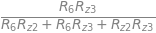

In [40]:
H_facts = (U_facts[v2]/U_facts[v1]).simplify()
H_facts

In [41]:
str(H_facts)

'R6*R_z3/(R6*R_z2 + R6*R_z3 + R_z2*R_z3)'

## Symbolic MNA procedure

### Load the netlist
The netlist generated by LTSpice is pasted into the cell below and some edits were made to remove the inductor series resistance and the independent sources are set to their DC values.

In [42]:
net_list = '''
V1 8 0 1
R1 1 8 1
R2 1 4 1
R3 3 1 1
R4 2 3 1
R5 2 6 1
R6 2 0 1
L1 4 5 1
L2 3 2 1 
L3 6 7 1 
C1 5 0 1
C2 2 3 1
C3 7 0 1
'''

Generate the network equations.

In [43]:
report, network_df, df2, A, X, Z = SymMNA.smna(net_list)

# Put matricies into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

Generate markdown text to display the network equations.

In [44]:
temp = ''
for i in range(len(X)):
    temp += '${:s}$<br>'.format(latex(Eq((A*X)[i:i+1][0],Z[i])))

Markdown(temp)

$v_{1} \cdot \left(\frac{1}{R_{3}} + \frac{1}{R_{2}} + \frac{1}{R_{1}}\right) - \frac{v_{3}}{R_{3}} - \frac{v_{4}}{R_{2}} - \frac{v_{8}}{R_{1}} = 0$<br>$- I_{L2} + v_{2} \left(C_{2} s + \frac{1}{R_{6}} + \frac{1}{R_{5}} + \frac{1}{R_{4}}\right) + v_{3} \left(- C_{2} s - \frac{1}{R_{4}}\right) - \frac{v_{6}}{R_{5}} = 0$<br>$I_{L2} + v_{2} \left(- C_{2} s - \frac{1}{R_{4}}\right) + v_{3} \left(C_{2} s + \frac{1}{R_{4}} + \frac{1}{R_{3}}\right) - \frac{v_{1}}{R_{3}} = 0$<br>$I_{L1} - \frac{v_{1}}{R_{2}} + \frac{v_{4}}{R_{2}} = 0$<br>$C_{1} s v_{5} - I_{L1} = 0$<br>$I_{L3} - \frac{v_{2}}{R_{5}} + \frac{v_{6}}{R_{5}} = 0$<br>$C_{3} s v_{7} - I_{L3} = 0$<br>$I_{V1} - \frac{v_{1}}{R_{1}} + \frac{v_{8}}{R_{1}} = 0$<br>$v_{8} = V_{1}$<br>$- I_{L1} L_{1} s + v_{4} - v_{5} = 0$<br>$- I_{L2} L_{2} s - v_{2} + v_{3} = 0$<br>$- I_{L3} L_{3} s + v_{6} - v_{7} = 0$<br>

As shown above MNA generated many equations and these would be difficult to solve by hand and a symbolic soultion would take a lot of computing time. The equations are displace in matrix notation.

In [45]:
NE_sym

⎡              ⎛1    1    1 ⎞   v₃   v₄   v₈            ⎤       
⎢           v₁⋅⎜── + ── + ──⎟ - ── - ── - ──            ⎥       
⎢              ⎝R₃   R₂   R₁⎠   R₃   R₂   R₁            ⎥       
⎢                                                       ⎥       
⎢           ⎛       1    1    1 ⎞      ⎛        1 ⎞   v₆⎥       
⎢-I_L2 + v₂⋅⎜C₂⋅s + ── + ── + ──⎟ + v₃⋅⎜-C₂⋅s - ──⎟ - ──⎥       
⎢           ⎝       R₆   R₅   R₄⎠      ⎝        R₄⎠   R₅⎥   ⎡0 ⎤
⎢                                                       ⎥   ⎢  ⎥
⎢             ⎛        1 ⎞      ⎛       1    1 ⎞   v₁   ⎥   ⎢0 ⎥
⎢   I_L2 + v₂⋅⎜-C₂⋅s - ──⎟ + v₃⋅⎜C₂⋅s + ── + ──⎟ - ──   ⎥   ⎢  ⎥
⎢             ⎝        R₄⎠      ⎝       R₄   R₃⎠   R₃   ⎥   ⎢0 ⎥
⎢                                                       ⎥   ⎢  ⎥
⎢                           v₁   v₄                     ⎥   ⎢0 ⎥
⎢                    I_L1 - ── + ──                     ⎥   ⎢  ⎥
⎢                           R₂   R₂                     ⎥   ⎢0 ⎥
⎢                        

The symbols generated by the Python code are extraced by the SymPy function free_symbols and then declared as SymPy variables. 

In [46]:
# turn the free symbols into SymPy variables
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))

Built a dictionary of element values.

In [47]:
element_values = SymMNA.get_part_values(network_df)
element_values

Generate the symbolic solution, which takes a couple of minutes on my laptop's Intel i3-8130U CPU @ 2.20GHz.

In [48]:
U_sym = solve(NE_sym,X)

The solution to the network equations in symbolic form are long, so the code to display them is commented out.

In [49]:
#temp = ''
#for i in U_sym.keys():
#    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U_sym[i]))

#Markdown(temp)

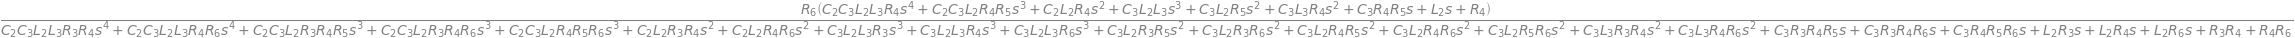

In [50]:
H_sym = (U_sym[v2]/U_sym[v1]).simplify()
H_sym

Can the symbolic expression be simplified, because this is whaythe FACT method is supposed to do, reveal aspects of the circuit operation that get hidden by the algebra.

In [51]:
H_num, H_denom = fraction(H_sym)

In [52]:
H_num

In [53]:
H_denom

expand

expand() is one of the most common simplification functions in SymPy. Although it has a lot of scopes, for now, we will consider its function in expanding polynomial expressions. For example:

Given a polynomial, expand() will put it into a canonical form of a sum of monomials.

expand() may not sound like a simplification function. After all, by its very name, it makes expressions bigger, not smaller. Usually this is the case, but often an expression will become smaller upon calling expand() on it due to cancellation.

cancel

cancel() will take any rational function and put it into the standard canonical form,
, where and are expanded polynomials with no common factors, and the leading coefficients of and do not have denominators (i.e., are integers).


Note that since factor() will completely factorize both the numerator and the denominator of an expression, it can also be used to do the same thing:

The voltage on node N is symplified with the chain of operators applied to the expression; [nsimplify()](https://docs.sympy.org/latest/modules/simplify/simplify.html#sympy.simplify.simplify.nsimplify), [simplify()](https://docs.sympy.org/latest/modules/simplify/simplify.html#simplify), [expand()](https://docs.sympy.org/latest/modules/core.html#sympy.core.function.expand) and [together()](https://docs.sympy.org/latest/modules/polys/reference.html#sympy.polys.rationaltools.together). This helps SymPy solve the inverse Laplace transform.



In [54]:
n, d = fraction(H_sym)
display('numerator', n.expand(), 'denominator', cancel(d,s))

'numerator'

'denominator'

In [55]:
d.factor()

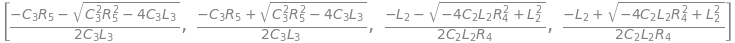

In [56]:
solve(n,s)

In [57]:
#solve(d,s)

## Numerical example
Put some element values in  

R = 1k  
L = 1uH  
C = 1nF  

Replace the above with some non ideal values

Non ideal capacitor

Non ideal inductor

give branches different resonant frequencies

In [58]:
element_values

In [59]:
element_values[C1] = 1e-9
element_values[C2] = 1e-9
element_values[C3] = 1e-9

element_values[L1] = 1e-6
element_values[L2] = 1e-6
element_values[L3] = 1e-6

element_values[R1] = 1e3
element_values[R2] = 1e3
element_values[R3] = 1e3
element_values[R4] = 1e3
element_values[R5] = 1e3
element_values[R6] = 1e3

In [60]:
element_values

### Numerical solution

In [61]:
NE = NE_sym.subs(element_values)
NE

⎡            0.003⋅v₁ - 0.001⋅v₃ - 0.001⋅v₄ - 0.001⋅v₈            ⎤   ⎡ 0 ⎤
⎢                                                                 ⎥   ⎢   ⎥
⎢-I_L2 + v₂⋅(1.0e-9⋅s + 0.003) + v₃⋅(-1.0e-9⋅s - 0.001) - 0.001⋅v₆⎥   ⎢ 0 ⎥
⎢                                                                 ⎥   ⎢   ⎥
⎢I_L2 - 0.001⋅v₁ + v₂⋅(-1.0e-9⋅s - 0.001) + v₃⋅(1.0e-9⋅s + 0.002) ⎥   ⎢ 0 ⎥
⎢                                                                 ⎥   ⎢   ⎥
⎢                   I_L1 - 0.001⋅v₁ + 0.001⋅v₄                    ⎥   ⎢ 0 ⎥
⎢                                                                 ⎥   ⎢   ⎥
⎢                       -I_L1 + 1.0e-9⋅s⋅v₅                       ⎥   ⎢ 0 ⎥
⎢                                                                 ⎥   ⎢   ⎥
⎢                   I_L3 - 0.001⋅v₂ + 0.001⋅v₆                    ⎥   ⎢ 0 ⎥
⎢                                                                 ⎥ = ⎢   ⎥
⎢                       -I_L3 + 1.0e-9⋅s⋅v₇                       ⎥   ⎢ 0 ⎥
⎢           

In [62]:
U = solve(NE,X)

In [63]:
temp = ''
for i in U.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U[i]))

Markdown(temp)

$v_{1} = \frac{2.0 s^{6} + 5003000000.0 s^{5} + 3.014 \cdot 10^{18} s^{4} + 1.5006 \cdot 10^{25} s^{3} + 3.014 \cdot 10^{33} s^{2} + 5.003 \cdot 10^{39} s + 2.0 \cdot 10^{45}}{3.0 s^{6} + 10004000000.0 s^{5} + 8.023 \cdot 10^{18} s^{4} + 3.2008 \cdot 10^{25} s^{3} + 8.023 \cdot 10^{33} s^{2} + 1.0004 \cdot 10^{40} s + 3.0 \cdot 10^{45}}$<br>$v_{2} = \frac{s^{6} + 2001000000.0 s^{5} + 1.005 \cdot 10^{18} s^{4} + 5.002 \cdot 10^{24} s^{3} + 1.005 \cdot 10^{33} s^{2} + 2.001 \cdot 10^{39} s + 1.0 \cdot 10^{45}}{3.0 s^{6} + 10004000000.0 s^{5} + 8.023 \cdot 10^{18} s^{4} + 3.2008 \cdot 10^{25} s^{3} + 8.023 \cdot 10^{33} s^{2} + 1.0004 \cdot 10^{40} s + 3.0 \cdot 10^{45}}$<br>$v_{3} = \frac{s^{6} + 2002000000.0 s^{5} + 1.008 \cdot 10^{18} s^{4} + 7.004 \cdot 10^{24} s^{3} + 1.008 \cdot 10^{33} s^{2} + 2.002 \cdot 10^{39} s + 1.0 \cdot 10^{45}}{3.0 s^{6} + 10004000000.0 s^{5} + 8.023 \cdot 10^{18} s^{4} + 3.2008 \cdot 10^{25} s^{3} + 8.023 \cdot 10^{33} s^{2} + 1.0004 \cdot 10^{40} s + 3.0 \cdot 10^{45}}$<br>$v_{4} = \frac{2.0 s^{6} + 3003000000.0 s^{5} + 1.1 \cdot 10^{16} s^{4} + 6.006 \cdot 10^{24} s^{3} + 1.1 \cdot 10^{31} s^{2} + 3.003 \cdot 10^{39} s + 2.0 \cdot 10^{45}}{3.0 s^{6} + 10004000000.0 s^{5} + 8.023 \cdot 10^{18} s^{4} + 3.2008 \cdot 10^{25} s^{3} + 8.023 \cdot 10^{33} s^{2} + 1.0004 \cdot 10^{40} s + 3.0 \cdot 10^{45}}$<br>$v_{5} = \frac{2.0 \cdot 10^{15} s^{4} + 3.003 \cdot 10^{24} s^{3} + 9.0 \cdot 10^{30} s^{2} + 3.003 \cdot 10^{39} s + 2.0 \cdot 10^{45}}{3.0 s^{6} + 10004000000.0 s^{5} + 8.023 \cdot 10^{18} s^{4} + 3.2008 \cdot 10^{25} s^{3} + 8.023 \cdot 10^{33} s^{2} + 1.0004 \cdot 10^{40} s + 3.0 \cdot 10^{45}}$<br>$v_{6} = \frac{s^{6} + 1001000000.0 s^{5} + 4.0 \cdot 10^{15} s^{4} + 2.002 \cdot 10^{24} s^{3} + 4.0 \cdot 10^{30} s^{2} + 1.001 \cdot 10^{39} s + 1.0 \cdot 10^{45}}{3.0 s^{6} + 10004000000.0 s^{5} + 8.023 \cdot 10^{18} s^{4} + 3.2008 \cdot 10^{25} s^{3} + 8.023 \cdot 10^{33} s^{2} + 1.0004 \cdot 10^{40} s + 3.0 \cdot 10^{45}}$<br>$v_{7} = \frac{1.0 \cdot 10^{15} s^{4} + 1.001 \cdot 10^{24} s^{3} + 3.0 \cdot 10^{30} s^{2} + 1.001 \cdot 10^{39} s + 1.0 \cdot 10^{45}}{3.0 s^{6} + 10004000000.0 s^{5} + 8.023 \cdot 10^{18} s^{4} + 3.2008 \cdot 10^{25} s^{3} + 8.023 \cdot 10^{33} s^{2} + 1.0004 \cdot 10^{40} s + 3.0 \cdot 10^{45}}$<br>$v_{8} = 1.0$<br>$I_{V1} = \frac{- s^{6} - 5001000000.0 s^{5} - 5.009 \cdot 10^{18} s^{4} - 1.7002 \cdot 10^{25} s^{3} - 5.009 \cdot 10^{33} s^{2} - 5.001 \cdot 10^{39} s - 1.0 \cdot 10^{45}}{3000.0 s^{6} + 10004000000000.0 s^{5} + 8.023 \cdot 10^{21} s^{4} + 3.2008 \cdot 10^{28} s^{3} + 8.023 \cdot 10^{36} s^{2} + 1.0004 \cdot 10^{43} s + 3.0 \cdot 10^{48}}$<br>$I_{L1} = \frac{2000000.0 s^{5} + 3.003 \cdot 10^{15} s^{4} + 9.0 \cdot 10^{21} s^{3} + 3.003 \cdot 10^{30} s^{2} + 2.0 \cdot 10^{36} s}{3.0 s^{6} + 10004000000.0 s^{5} + 8.023 \cdot 10^{18} s^{4} + 3.2008 \cdot 10^{25} s^{3} + 8.023 \cdot 10^{33} s^{2} + 1.0004 \cdot 10^{40} s + 3.0 \cdot 10^{45}}$<br>$I_{L2} = \frac{1000000000000.0 s^{2} + 1.0 \cdot 10^{21} s + 1.0 \cdot 10^{27}}{3.0 s^{4} + 4004000000.0 s^{3} + 1.2 \cdot 10^{16} s^{2} + 4.004 \cdot 10^{24} s + 3.0 \cdot 10^{30}}$<br>$I_{L3} = \frac{1000000.0 s^{5} + 1.001 \cdot 10^{15} s^{4} + 3.0 \cdot 10^{21} s^{3} + 1.001 \cdot 10^{30} s^{2} + 1.0 \cdot 10^{36} s}{3.0 s^{6} + 10004000000.0 s^{5} + 8.023 \cdot 10^{18} s^{4} + 3.2008 \cdot 10^{25} s^{3} + 8.023 \cdot 10^{33} s^{2} + 1.0004 \cdot 10^{40} s + 3.0 \cdot 10^{45}}$<br>

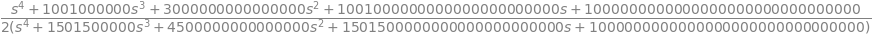

In [64]:
H = (U[v2]/U[v1]).nsimplify().simplify().expand().together()
H

#### Convert transfer function to SciPy system
In this section we convert the SymPy equations into Numpy format.  

Extract the numerator and denominator polynomials so that the system can be defined in SciPy.

In [65]:
H_num, H_denom = fraction(H) #returns numerator and denominator

The SciPy function, TransferFunction, represents the system as the continuous-time transfer function and takes as inputs the coeeficients of the numerator and denominator polynominals.

In [66]:
# convert symbolic to numpy polynomial
a = np.array(Poly(H_num, s).all_coeffs(), dtype=float)
b = np.array(Poly(H_denom, s).all_coeffs(), dtype=float)
sys = signal.TransferFunction(a,b)

### Poles and zeros of the low pass transfer function
The poles and zeros of the transfer function can easly be obtained with the following code:

In [67]:
sys_zeros = np.roots(sys.num)
sys_poles = np.roots(sys.den)

#### Low pass filter pole zero plot
The poles and zeros of the preamp transfer function are plotted.

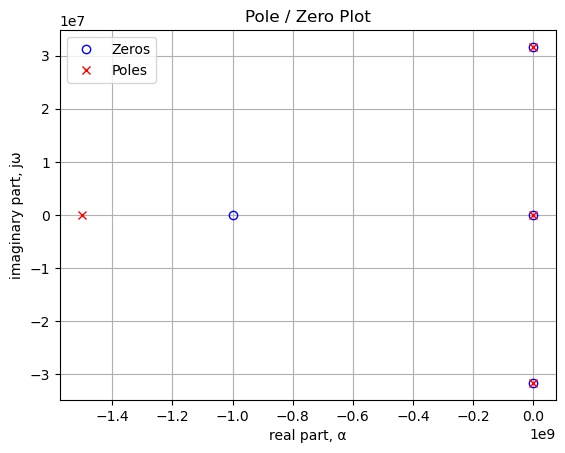

In [68]:
plt.plot(np.real(sys_zeros), np.imag(sys_zeros), 'ob', markerfacecolor='none')
plt.plot(np.real(sys_poles), np.imag(sys_poles), 'xr')
plt.legend(['Zeros', 'Poles'], loc=0)
plt.title('Pole / Zero Plot')
plt.xlabel('real part, \u03B1')
plt.ylabel('imaginary part, j\u03C9')
plt.grid()
plt.show()

Poles and zeros of the transfer function plotted on the complex plane. The units are in radian frequency.

Printing these values in Hz.

In [69]:
print('number of zeros: {:d}'.format(len(sys_zeros)))
for i in sys_zeros:
    print('{:,.2f} Hz'.format(i/(2*np.pi)))

number of zeros: 4
-158,995,628.67+0.00j Hz
-79,577.47+5,032,292.06j Hz
-79,577.47-5,032,292.06j Hz
-159,314.42+0.00j Hz


In [70]:
print('number of poles: {:d}'.format(len(sys_poles)))
for i in sys_poles:
    print('{:,.2f} Hz'.format(i/(2*np.pi)))

number of poles: 4
-238,599,696.99+0.00j Hz
-132,643.87+5,031,172.98j Hz
-132,643.87-5,031,172.98j Hz
-106,162.31+0.00j Hz


### Bode plot
Use the SciPy function [bode](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.bode.html) to plot the magnitude and phase of the filter. In electrical engineering, a [Bode plot](https://en.wikipedia.org/wiki/Bode_plot) is a graph of the frequency response of a system. It is usually a combination of the magnitude (usually in decibels) of the frequency response and the phase shift. As originally conceived by Hendrik Wade Bode in the 1930s, the plot is an asymptotic approximation of the frequency response, using straight line segments. Bode plots are used to assess the stability of systems by finding the gain and phase margins.

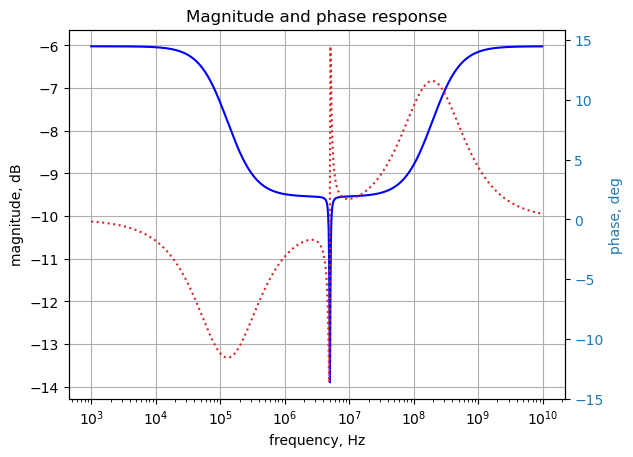

In [71]:
x = np.logspace(3, 10, 1000, endpoint=False)*2*np.pi
w, mag, phase = signal.bode(sys, w=x) # returns: rad/s, mag in dB, phase in deg

fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

plt.semilogx(w/(2*np.pi), mag,'-b')    # Bode magnitude plot

ax1.tick_params(axis='y')
#ax1.set_ylim((-30,20))
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'

plt.semilogx(w/(2*np.pi), phase,':',color='tab:red')  # Bode phase plot

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim((-5,25))

plt.title('Magnitude and phase response')
plt.show()